In [4]:
import pandas as pd
import os

In [5]:
os.getcwd()

'/home/vizziwo/capcookie/notebooks/old_notebooks'

In [6]:
wapo = pd.read_csv('/home/vizziwo/capcookie/data/processed/fatalwrangling.csv', index_col=0)


In [7]:
wapo.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4895,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
4896,5928,Terron Jammal Boone,2020-06-17,shot,gun,31.0,M,B,Rosamond,CA,False,attack,Not fleeing,False
4897,5930,TK TK,2020-06-18,shot,gun,38.0,M,W,Westminister,CO,False,other,Not fleeing,False
4898,5933,Andres Guardado,2020-06-18,shot,gun,18.0,M,H,Gardena,CA,False,other,Foot,False
4899,5941,Cody W. Cook,2020-06-19,shot,gun,24.0,M,W,Sodus,NY,False,attack,Not fleeing,True


## For some reason I thought 'gun and vehicle' was too confusing to classify as gun or vehicle, so i just dropped these rows:

In [8]:
wapo[wapo['armed']=='gun and vehicle']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3410,3990,Fabian Ortiz Adame,2018-08-27,shot,gun and vehicle,25.0,M,W,Phoenix,AZ,False,attack,Car,False
3689,4374,Geoffrey Morris,2019-01-10,shot,gun and vehicle,29.0,M,W,Wichita,KS,False,attack,Car,False
4183,4934,Jose Mendez,2019-08-09,shot,gun and vehicle,37.0,M,H,Kansas City,MO,False,attack,Foot,False
4214,5002,Rene Enrique Ruiz,2019-08-30,shot,gun and vehicle,51.0,M,H,Tolleson,AZ,False,attack,Other,False
4314,5476,Cameron Bennett,2019-10-17,shot,gun and vehicle,22.0,M,B,Fayette,MS,False,attack,Car,False
4318,5219,Terry Countryman,2019-10-19,shot,gun and vehicle,34.0,M,W,Palestine,TX,False,attack,Other,False
4415,5485,Nicholas Cantelmi,2019-11-28,shot,gun and vehicle,31.0,M,W,Jim Thorpe,PA,False,attack,Other,False
4424,5233,Yemerson Melendez,2019-12-01,shot,gun and vehicle,16.0,M,H,Fort Pierce,FL,False,attack,Other,False
4491,5317,Richard Ruiz,2019-12-23,shot,gun and vehicle,38.0,M,H,Phoenix,AZ,False,attack,Car,False
4737,5704,Austin Hines,2020-04-01,shot,gun and vehicle,19.0,M,W,Columbus,MS,False,attack,Car,False


In [9]:
gunand = wapo[(wapo['armed']=='gun and vehicle')]
wapo = wapo.drop(index = gunand.index)

In [10]:
wapo[wapo['armed'].str.contains('gun|vehicle|knife|unarmed|unknown|undetermined')==False].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
16,32,James Dudley Barker,2015-01-08,shot,shovel,42.0,M,W,Salt Lake City,UT,False,attack,Not fleeing,True
50,99,Tiano Meton,2015-01-22,shot,toy weapon,25.0,M,B,Sierra Blanca,TX,False,attack,Car,False
69,346,Matautu Nuu,2015-01-28,shot and Tasered,hammer,35.0,M,A,Stockton,CA,True,attack,Not fleeing,False


# One-hot encoded all armed_with categories

In [11]:
wapo['armed_gun'] = wapo['armed'].str.contains('gun') == 1
wapo['armed_vehicle'] = wapo['armed'].str.contains('vehicle') == 1
wapo['armed_knife'] = wapo['armed'].str.contains('knife') == 1
wapo['armed_unknown'] = (wapo.armed.str.contains('unknown|undetermined')) == 1
wapo['unarmed'] = wapo.armed.str.contains('unarmed') == 1
wapo['untraditional_weapon'] = (wapo['armed'].str.contains('gun|vehicle|knife|unarmed|unknown|undetermined')==False) ==1

In [12]:
wapo.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,False,False,False,False,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,False,False,False,False,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,False,False,False,False,True,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,False,False,False,False,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,False,False,False,False,False


In [13]:
wapo = wapo.dropna()

In [14]:
wapo = wapo.drop(columns = ['id','name','date','city','state'])

In [15]:
wapo.columns

Index(['manner_of_death', 'armed', 'age', 'gender', 'race',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'armed_gun', 'armed_vehicle', 'armed_knife', 'armed_unknown', 'unarmed',
       'untraditional_weapon'],
      dtype='object')

In [16]:
wapo['blackhispanic'] = wapo['race'].str.contains('B|H')
other = wapo.loc[:,['gender','manner_of_death','threat_level','flee']]
w = pd.concat((wapo, pd.get_dummies(other)), axis=1)


In [17]:
cols = ['gender','manner_of_death','armed','threat_level','flee']
w = w.drop(columns = cols)

# MODEL 1: Kept Blackhispanic, dropped race

In [18]:
cols = ['race']
w = w.drop(columns = cols)

In [19]:
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 999
list(w.columns)

['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'blackhispanic',
 'gender_F',
 'gender_M',
 'gender_Nonbinary',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

In [20]:
w.head()

,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic,...,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,53.0,True,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
1,47.0,False,False,True,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,1,0
2,23.0,False,False,False,False,False,False,True,False,True,...,0,0,1,0,1,0,0,0,1,0
3,32.0,True,False,False,False,False,False,False,True,False,...,0,1,0,1,0,0,0,0,1,0
4,39.0,False,False,True,False,False,False,False,False,True,...,0,1,0,1,0,0,0,0,1,0


In [21]:
import turicreate
sf = turicreate.SFrame(w)

In [22]:
feats = ['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

In [23]:
train_data,test_data = sf.random_split(.8,seed=0)
race_model = turicreate.logistic_classifier.create(train_data,target='blackhispanic', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3934

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 20

Number of coefficients      : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.024646     | 0.630910          | 0.606695            |

| 2         | 3        | 1.042720     | 0.631673          | 0.610879            |

| 3         | 4        | 1.060693     | 0.631673          | 0.610879            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [24]:
race_model.evaluate

<bound method LogisticClassifier.evaluate of Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 21
Number of examples             : 3934
Number of classes              : 2
Number of feature columns      : 20
Number of unpacked features    : 20

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 3
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0741

Settings
--------
Log-likelihood                 : 2513.5467

Highest Positive Coefficients
-----------------------------
gender_M                       : 2.5588
gender_F                       : 2.0053
unarmed                        : 0.9717
untraditional_weapon           : 0.7705
armed_gun                      : 0.7282

Lowest Negative Coefficients
----------------------------
(

In [25]:
race_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 437 | 519 |
 |   1e-05   | 1.0 | 1.0 | 437 | 519 |
 |   2e-05   | 1.0 | 1.0 | 437 | 519 |
 |   3e-05   | 1.0 | 1.0 | 437 | 519 |
 |   4e-05   | 1.0 | 1.0 | 437 | 519 |
 |   5e-05   | 1.0 | 1.0 | 437 | 519 |
 |   6e-05   | 1.0 | 1.0 | 437 | 519 |
 |   7e-05   | 1.0 | 1.0 | 437 | 519 |
 |   8e-05   | 1.0 | 1.0 | 437 | 519 |
 |   9e-05   | 1.0 | 1.0 | 437 | 519 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

In [26]:
sf['predicted_black'] = race_model.predict(sf, output_type = 'probability')

In [27]:
w['predicted_black'] = race_model.predict(sf, output_type = 'probability')

In [28]:
pd.options.display.max_columns = 999
w.sort_values(by='predicted_black', ascending=False).loc[:,['blackhispanic','predicted_black']].head()

,blackhispanic,predicted_black
811,False,0.837844
2189,True,0.836708
2158,True,0.831317
1671,True,0.823779
3246,True,0.818799


# MODEL 2: Just Blackhispanic and White (no Asian, NatAm, Other), No Age-Group Cols

In [29]:
wapo.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic
0,shot,gun,53.0,M,A,True,attack,Not fleeing,False,True,False,False,False,False,False,False
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False,False,False,False,False,True,False,True
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False,False,False,False,False,False,True,False
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False,True,False,False,False,False,False,True


In [30]:
mask = wapo['race'].str.contains('A|O|N|H')
wapo2 = wapo[~mask]
wapo2.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False,False,False,False,False,False,True,False
5,shot,gun,18.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False
7,shot,gun,35.0,M,W,False,attack,Not fleeing,False,True,False,False,False,False,False,False
8,shot,unarmed,34.0,F,W,False,other,Not fleeing,True,False,False,False,False,True,False,False


In [31]:
wapo2['blackhispanic'] = wapo2['race'].str.contains('B|H')
other = wapo2.loc[:,['gender','manner_of_death','threat_level','flee']]
w2 = pd.concat((wapo2, pd.get_dummies(other)), axis=1)
cols = ['gender','manner_of_death','armed','threat_level','flee','race']
w2 = w2.drop(columns = cols)
w2.head()

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic,gender_F,gender_M,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
1,47.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0
3,32.0,True,False,False,False,False,False,False,True,False,0,1,0,1,0,1,0,0,0,0,1,0
5,18.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0
7,35.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0
8,34.0,False,True,False,False,False,False,True,False,False,1,0,0,1,0,0,1,0,0,0,1,0


In [32]:
feats = ['age',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']

sf = turicreate.SFrame(w2)
train_data,test_data = sf.random_split(.8,seed=0)
race_model = turicreate.logistic_classifier.create(train_data,target='blackhispanic', features=feats, validation_set=test_data)


Logistic regression:

--------------------------------------------------------

Number of examples          : 3030

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 20

Number of coefficients      : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.027489     | 0.686139          | 0.686910            |

| 2         | 3        | 0.038240     | 0.693399          | 0.688259            |

| 3         | 4        | 0.048260     | 0.693069          | 0.686910            |

| 4         | 5        | 0.057953     | 0.693069          | 0.686910            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [33]:
race_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 247 | 494 |
 |   1e-05   | 1.0 | 1.0 | 247 | 494 |
 |   2e-05   | 1.0 | 1.0 | 247 | 494 |
 |   3e-05   | 1.0 | 1.0 | 247 | 494 |
 |   4e-05   | 1.0 | 1.0 | 247 | 494 |
 |   5e-05   | 1.0 | 1.0 | 247 | 494 |
 |   6e-05   | 1.0 | 1.0 | 247 | 494 |
 |   7e-05   | 1.0 | 1.0 | 247 | 494 |
 |   8e-05   | 1.0 | 1.0 | 247 | 494 |
 |   9e-05   | 1.0 | 1.0 | 247 | 494 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

## Not sure how to read this chart. Not sure how to visualize curve.

# MODEL 3, just BlackHispanic and White, with Age-Group Cols

In [34]:
df = w2
df['0_to_10'] = df.age <= 0
df['11_to_20'] = (df.age>10)&(df.age<21)
df['21_to_30'] = (df.age>20)&(df.age<31)
df['31_to_40'] = (df.age>30)&(df.age<41)
df['41_to_50'] = (df.age>40)&(df.age<51)
df['51_to_60'] = (df.age>50)&(df.age<61)
df['61_to_70'] = (df.age>60)&(df.age<71)
df['71_to_80'] = (df.age>70)&(df.age<81)
df['81_to_90'] = (df.age>80)&(df.age<91)
df=df.drop('age',axis=1)
df

,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic,gender_F,gender_M,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,0_to_10,11_to_20,21_to_30,31_to_40,41_to_50,51_to_60,61_to_70,71_to_80,81_to_90
1,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,True,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,True,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False
8,False,True,False,False,False,False,True,False,False,1,0,0,1,0,0,1,0,0,0,1,0,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,True,False,False,False,False,False,False,0,1,0,1,0,0,1,0,0,0,0,1,False,False,True,False,False,False,False,False,False
4895,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,1,0,0,0,False,False,False,True,False,False,False,False,False
4896,False,False,True,False,False,False,False,False,True,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False
4897,False,False,True,False,False,False,False,False,False,0,1,0,1,0,0,1,0,0,0,1,0,False,False,False,True,False,False,False,False,False


In [35]:
feats = [
'0_to_10', 
'11_to_20',
'21_to_30', 
'31_to_40', 
'41_to_50', 
'51_to_60', 
'61_to_70', 
'71_to_80',
'81_to_90',
 'signs_of_mental_illness',
 'body_camera',
 'armed_gun',
 'armed_vehicle',
 'armed_knife',
 'armed_unknown',
 'unarmed',
 'untraditional_weapon',
 'gender_F',
 'gender_M',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined',
 'flee_Car',
 'flee_Foot',
 'flee_Not fleeing',
 'flee_Other']


sf = turicreate.SFrame(df)
train_data,test_data = sf.random_split(.8,seed=0)
race_model = turicreate.logistic_classifier.create(train_data,target='blackhispanic', features=feats, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 3030

Number of classes           : 2

Number of feature columns   : 28

Number of unpacked features : 28

Number of coefficients      : 29

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.022209     | 0.680858          | 0.688259            |

| 2         | 3        | 0.055245     | 0.681188          | 0.686910            |

| 3         | 4        | 0.070631     | 0.681188          | 0.686910            |

| 4         | 5        | 0.085660     | 0.681188          | 0.686910            |

| 5         | 6        | 0.098356     | 0.681188          | 0.686910            |

| 9         | 10       | 0.161206     | 0.681188          | 0.686910            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

# Based on "accuracy" as measure, the best model is No. 2

In [36]:
race_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+-----+
 | threshold | fpr | tpr |  p  |  n  |
 +-----------+-----+-----+-----+-----+
 |    0.0    | 1.0 | 1.0 | 247 | 494 |
 |   1e-05   | 1.0 | 1.0 | 247 | 494 |
 |   2e-05   | 1.0 | 1.0 | 247 | 494 |
 |   3e-05   | 1.0 | 1.0 | 247 | 494 |
 |   4e-05   | 1.0 | 1.0 | 247 | 494 |
 |   5e-05   | 1.0 | 1.0 | 247 | 494 |
 |   6e-05   | 1.0 | 1.0 | 247 | 494 |
 |   7e-05   | 1.0 | 1.0 | 247 | 494 |
 |   8e-05   | 1.0 | 1.0 | 247 | 494 |
 |   9e-05   | 1.0 | 1.0 | 247 | 494 |
 +-----------+-----+-----+-----+-----+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

In [37]:
w2.head()

,age,signs_of_mental_illness,body_camera,armed_gun,armed_vehicle,armed_knife,armed_unknown,unarmed,untraditional_weapon,blackhispanic,gender_F,gender_M,gender_Nonbinary,manner_of_death_shot,manner_of_death_shot and Tasered,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,0_to_10,11_to_20,21_to_30,31_to_40,41_to_50,51_to_60,61_to_70,71_to_80,81_to_90
1,47.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,False,True,False,False,False,False
3,32.0,True,False,False,False,False,False,False,True,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False
5,18.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,True,False,False,False,False,False,False,False
7,35.0,False,False,True,False,False,False,False,False,False,0,1,0,1,0,1,0,0,0,0,1,0,False,False,False,True,False,False,False,False,False
8,34.0,False,True,False,False,False,False,True,False,False,1,0,0,1,0,0,1,0,0,0,1,0,False,False,False,True,False,False,False,False,False


In [44]:
w3 = w2.iloc[:, :22]

In [45]:
w3.columns

Index(['age', 'signs_of_mental_illness', 'body_camera', 'armed_gun',
       'armed_vehicle', 'armed_knife', 'armed_unknown', 'unarmed',
       'untraditional_weapon', 'blackhispanic', 'gender_F', 'gender_M',
       'gender_Nonbinary', 'manner_of_death_shot',
       'manner_of_death_shot and Tasered', 'threat_level_attack',
       'threat_level_other', 'threat_level_undetermined', 'flee_Car',
       'flee_Foot', 'flee_Not fleeing', 'flee_Other'],
      dtype='object')

In [46]:
X=w3.drop(columns='blackhispanic')

In [47]:
y=w3.blackhispanic

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.6235924782918, tolerance: 0.08509090426942456
  positive)


[-8.69628376e-03 -1.46180960e-01  1.28686910e-01 -2.02578228e-02
  1.94313559e-02 -5.48656940e-02 -2.56614063e-02  2.94140057e-02
 -6.20512995e-02 -5.63109945e-02  1.78530075e-03 -3.10851169e-01
 -4.41472929e-02 -3.11798317e-16  1.46387144e-02 -3.48052500e-03
  1.73706452e-02 -4.38109917e-02  1.03008400e-01 -2.63002153e-03
 -2.69767436e-02]


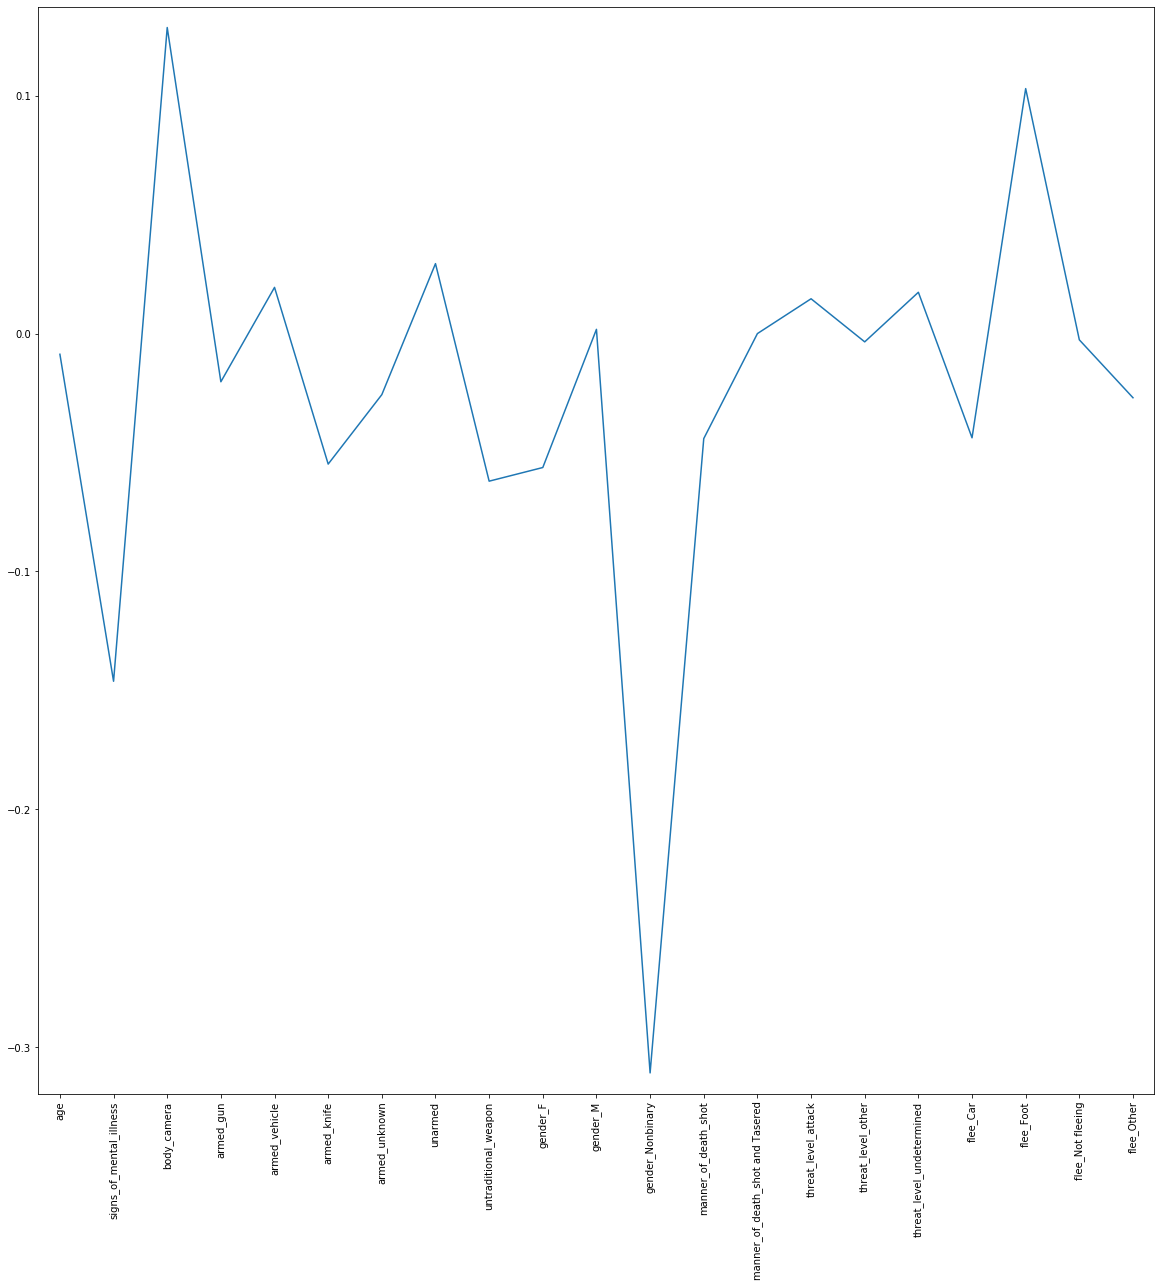

In [50]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0., normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.figure(figsize=(20,20))
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.margins(0.02)
plt.show()

#### Looking at the counts of the features that the above plot deems more important 

In [62]:
#Overall count of blackhispanic and non-blackhispanic
w2.blackhispanic.value_counts()

False    2474
True     1297
Name: blackhispanic, dtype: int64

In [57]:
#Counts of blackhispanic who are fleeing on foot
w2[(w2.flee_Foot==True)].blackhispanic.value_counts()

True     254
False    231
Name: blackhispanic, dtype: int64

In [61]:
#Counts of blackhispanic who are unarmed
w2[(w2.unarmed==True)].blackhispanic.value_counts()

False    145
True     123
Name: blackhispanic, dtype: int64

In [60]:
#Counts of blackhispanic who are unarmed and fleeing on foot
w2[(w2.flee_Foot==True)&(w2.unarmed==True)].blackhispanic.value_counts()

True     37
False    24
Name: blackhispanic, dtype: int64

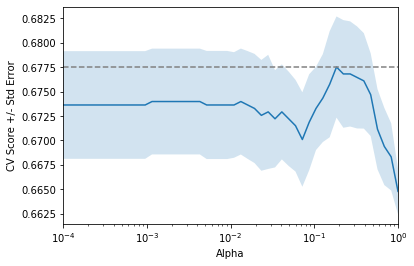

In [75]:
# Import necessary modules
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = RidgeClassifier(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X_train,y_train,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [79]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(normalize=True, alpha=0.1)
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, normalize=True)

In [80]:
y_pred = ridge.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[574  43]
 [242  84]]
              precision    recall  f1-score   support

       False       0.70      0.93      0.80       617
        True       0.66      0.26      0.37       326

    accuracy                           0.70       943
   macro avg       0.68      0.59      0.59       943
weighted avg       0.69      0.70      0.65       943



In [70]:
y_pred

array([ 0.27591026,  0.36285163,  0.41040356,  0.5343268 ,  0.26472639,
        0.34168399,  0.12559422,  0.37351693,  0.30415954,  0.2355331 ,
        0.28373793,  0.35966284,  0.25217615,  0.23766858,  0.2126193 ,
        0.26791519,  0.27005622,  0.34495648,  0.5333454 ,  0.21635924,
        0.291833  ,  0.13368408,  0.34425634,  0.22960193,  0.37867437,
        0.34935953,  0.21725817,  0.46214306,  0.30294744,  0.2126193 ,
        0.30407676,  0.29635351,  0.291733  ,  0.67309139,  0.49742863,
        0.39342349,  0.38533364,  0.14850803,  0.33007468,  0.43114197,
        0.43039351,  0.24418108,  0.58189503,  0.26327632,  0.56171838,
        0.56499088,  0.43331787,  0.13002661,  0.18097382,  0.24745358,
        0.32656728,  0.26799889,  0.44578898,  0.27508995,  0.40483512,
        0.3445367 ,  0.3383023 ,  0.50080099,  0.34755343,  0.42754147,
        0.53919061,  0.2909127 ,  0.37501392,  0.23894085,  0.40558877,
        0.46578315,  0.54550768,  0.41487843,  0.31546711,  0.54

3538     True
2286    False
1828     True
3256    False
3996    False
        ...  
1449    False
1660    False
1101    False
4567    False
4154    False
Name: blackhispanic, Length: 2828, dtype: bool